In [213]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [215]:
# 2. Upload the datasets
happy_data = pd.read_csv(r"C:\Users\sulmu\PYTHONEnvi\data\HappyState1.csv")
sad_data = pd.read_csv(r"C:\Users\sulmu\PYTHONEnvi\data\SadState5.csv")
raw_vs_filtered_sad_df = pd.read_csv(r"C:\Users\sulmu\PYTHONEnvi\data\rawvsfiltered_Sad5.csv")
raw_vs_filtered_happy_df = pd.read_csv(r"C:\Users\sulmu\PYTHONEnvi\data\rawvsfiltered_Happy1.csv")

In [216]:
print("Happy State Columns:")
print(happy_data.columns)

print("Sad State Columns:")
print(sad_data.columns)

Happy State Columns:
Index(['timestamp', 'spectral_entropy', 'permutation_entropy', 'theta_psd',
       'theta_meanpsd', 'theta_mean', 'theta_std', 'theta_power',
       'theta_freqs', 'alpha_psd', 'alpha_meanpsd', 'alpha_mean', 'alpha_std',
       'alpha_power', 'alpha_freqs', 'beta_psd', 'beta_meanpsd', 'beta_mean',
       'beta_std', 'beta_power', 'beta_freqs', 'gamma_psd', 'gamma_meanpsd',
       'gamma_mean', 'gamma_std', 'gamma_power', 'gamma_freqs', 'power_ratio',
       'label'],
      dtype='object')
Sad State Columns:
Index(['timestamp', 'spectral_entropy', 'permutation_entropy', 'theta_psd',
       'theta_meanpsd', 'theta_mean', 'theta_std', 'theta_power',
       'theta_freqs', 'alpha_psd', 'alpha_meanpsd', 'alpha_mean', 'alpha_std',
       'alpha_power', 'alpha_freqs', 'beta_psd', 'beta_meanpsd', 'beta_mean',
       'beta_std', 'beta_power', 'beta_freqs', 'gamma_psd', 'gamma_meanpsd',
       'gamma_mean', 'gamma_std', 'gamma_power', 'gamma_freqs', 'power_ratio',
       'lab

In [217]:
# 4. Data shape
print("Shape of Happy State Data:", happy_data.shape)
print("Shape of Sad State Data:", sad_data.shape)
print("Shape of Raw vs Filtered Sad Data:", raw_vs_filtered_sad_df.shape)
print("Shape of Raw vs Filtered Happy Data:", raw_vs_filtered_happy_df.shape)

Shape of Happy State Data: (329, 29)
Shape of Sad State Data: (329, 29)
Shape of Raw vs Filtered Sad Data: (336896, 4)
Shape of Raw vs Filtered Happy Data: (378880, 4)


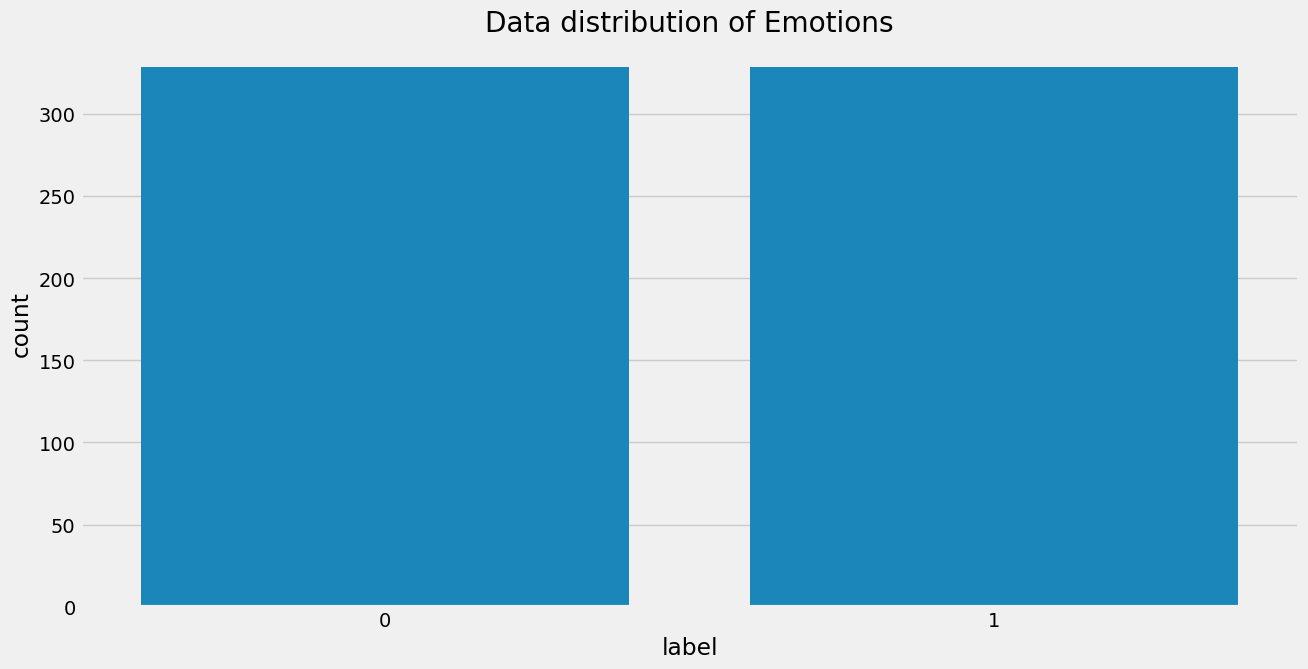

In [ ]:
# 5. Plotting DataFrame distribution based on 'label' column (Emotions: Happy vs Sad)
plt.figure(figsize=(14, 7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')  
sns.countplot(x='label', data=pd.concat([happy_data, sad_data]))  # Combine happy and sad datasets for distribution
plt.show()

In [ ]:
#  raw and filtered data for both Happy and Sad states
raw_data_happy = raw_vs_filtered_happy_df[raw_vs_filtered_happy_df['type'] == 'raw']
filtered_data_happy = raw_vs_filtered_happy_df[raw_vs_filtered_happy_df['type'] == 'filtered']

raw_data_sad = raw_vs_filtered_sad_df[raw_vs_filtered_sad_df['type'] == 'raw']
filtered_data_sad = raw_vs_filtered_sad_df[raw_vs_filtered_sad_df['type'] == 'filtered']

In [232]:
# Extract the first 512 samples (entire buffer size)
raw_data_buffer_happy = raw_data_happy.iloc[512:1024]
filtered_data_buffer_happy = filtered_data_happy.iloc[512:1024]

raw_data_buffer_sad = raw_data_sad.iloc[512:1024]
filtered_data_buffer_sad = filtered_data_sad.iloc[512:1024]

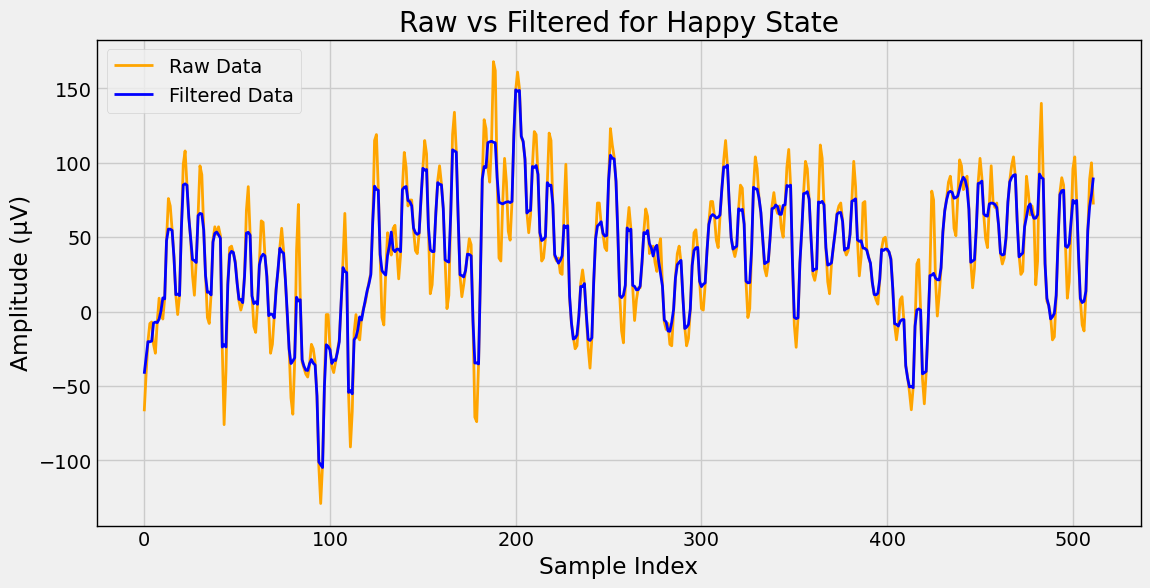

In [234]:
# Plotting Time Domain (Raw and Filtered Data for 512 samples)
plt.figure(figsize=(12, 6))

plt.plot(raw_data_buffer_happy['index'], raw_data_buffer_happy['value'], label="Raw Data", color='orange', linewidth=2)
plt.plot(filtered_data_buffer_happy['index'], filtered_data_buffer_happy['value'], label="Filtered Data", color='blue', linewidth=2)
plt.title(f'Raw vs Filtered for Happy State')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (µV)')
plt.legend()
# Set frame for the plot
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)  
plt.grid(True)
plt.show()

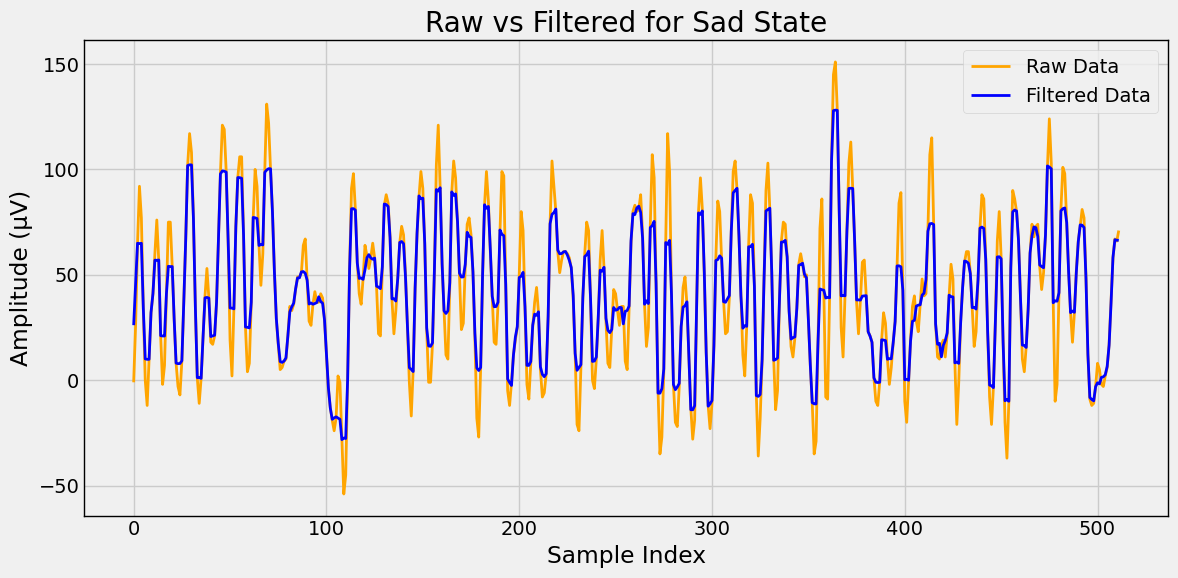

In [235]:
# Plot for Sad State
plt.figure(figsize=(12, 6))
plt.plot(raw_data_buffer_sad['index'], raw_data_buffer_sad['value'], label="Raw Data", color='orange', linewidth=2)
plt.plot(filtered_data_buffer_sad['index'], filtered_data_buffer_sad['value'], label="Filtered Data", color='blue', linewidth=2)
plt.title(f'Raw vs Filtered for Sad State')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (µV)')
plt.legend()
# Set frame for the plot
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)  
plt.grid(True)
plt.tight_layout()
plt.show()

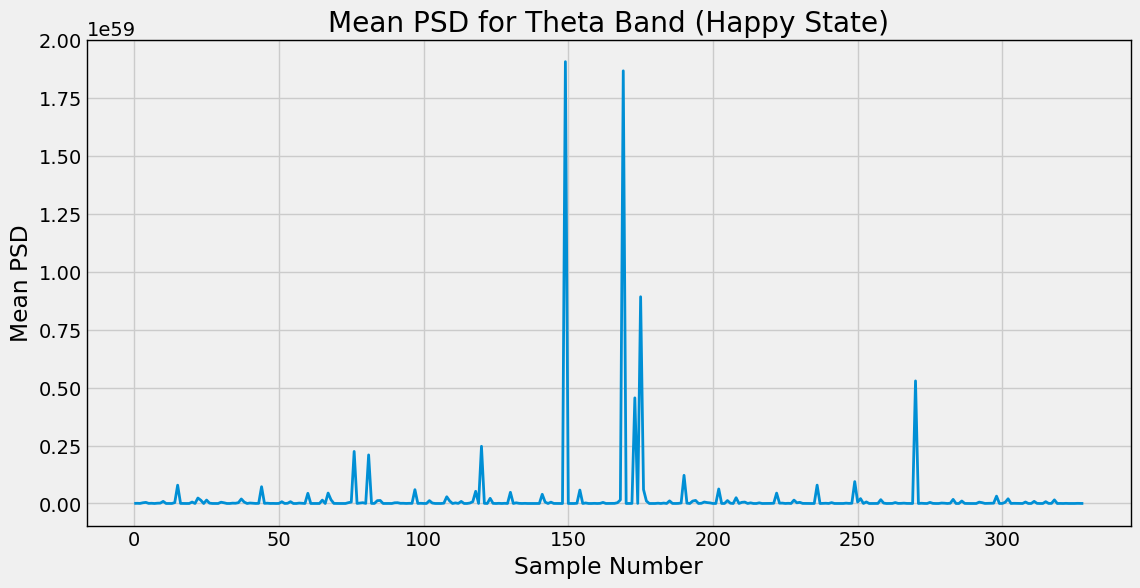

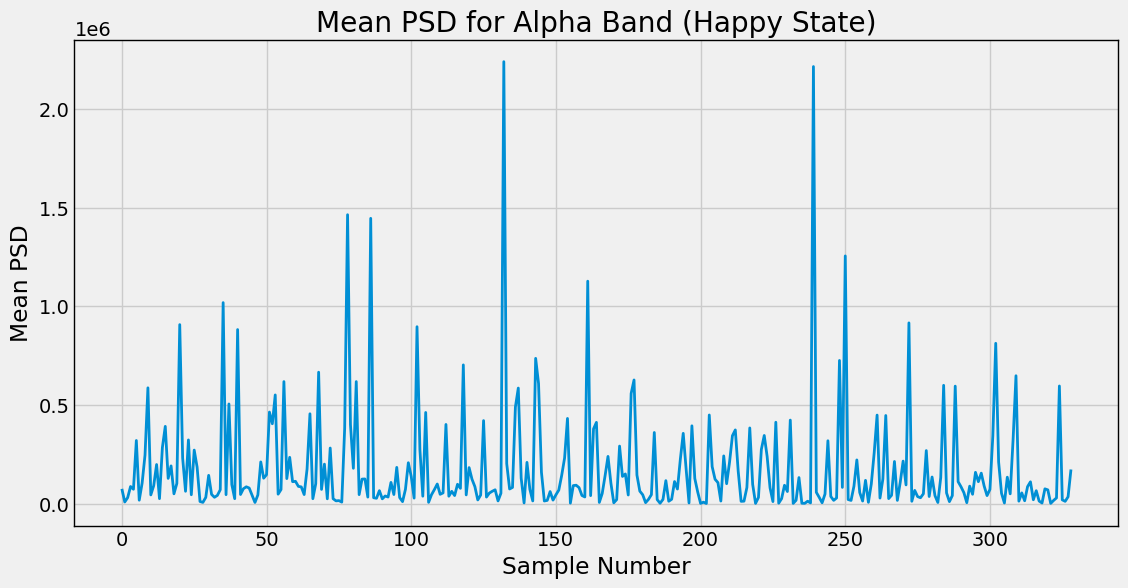

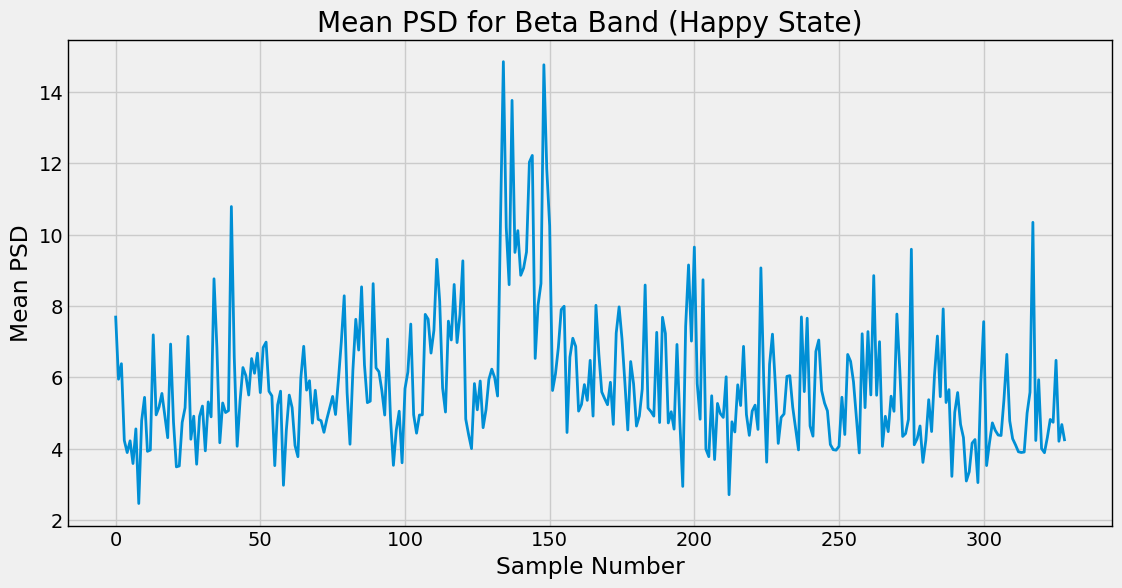

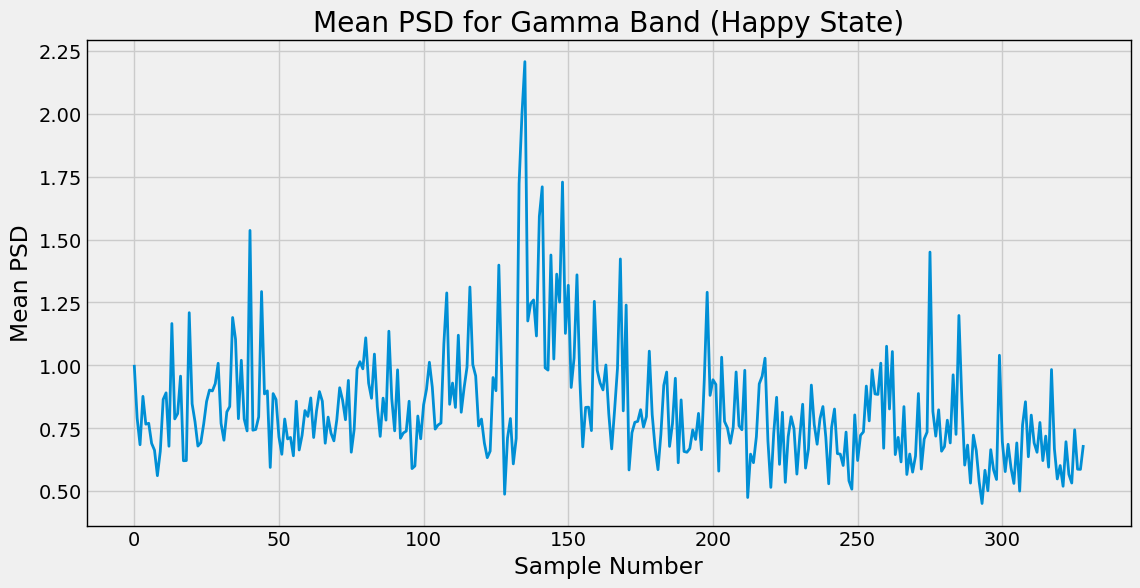

In [238]:
# 7. Plot Mean PSD for each band against the number of samples
plt.figure(figsize=(12, 6))
# Theta Band
plt.plot(happy_data['theta_meanpsd'], label='Theta Band',linewidth=2)
plt.title('Mean PSD for Theta Band (Happy State)')
plt.xlabel('Sample Number')
plt.ylabel('Mean PSD')
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1) 
plt.show()


plt.figure(figsize=(12, 6))
# Alpha Band
plt.plot(happy_data['alpha_meanpsd'], label='Alpha Band',linewidth=2)
plt.title('Mean PSD for Alpha Band (Happy State)')
plt.xlabel('Sample Number')
plt.ylabel('Mean PSD')
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1) 
plt.show()


plt.figure(figsize=(12, 6))
# Beta Band
plt.plot(happy_data['beta_meanpsd'], label='Beta Band',linewidth=2)
plt.title('Mean PSD for Beta Band (Happy State)')
plt.xlabel('Sample Number')
plt.ylabel('Mean PSD')
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1) 
plt.show()


plt.figure(figsize=(12, 6))
# Gamma Band
plt.plot(happy_data['gamma_meanpsd'], label='Gamma Band',linewidth=2)
plt.title('Mean PSD for Gamma Band (Happy State)')
plt.xlabel('Sample Number')
plt.ylabel('Mean PSD')
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1) 
plt.show()

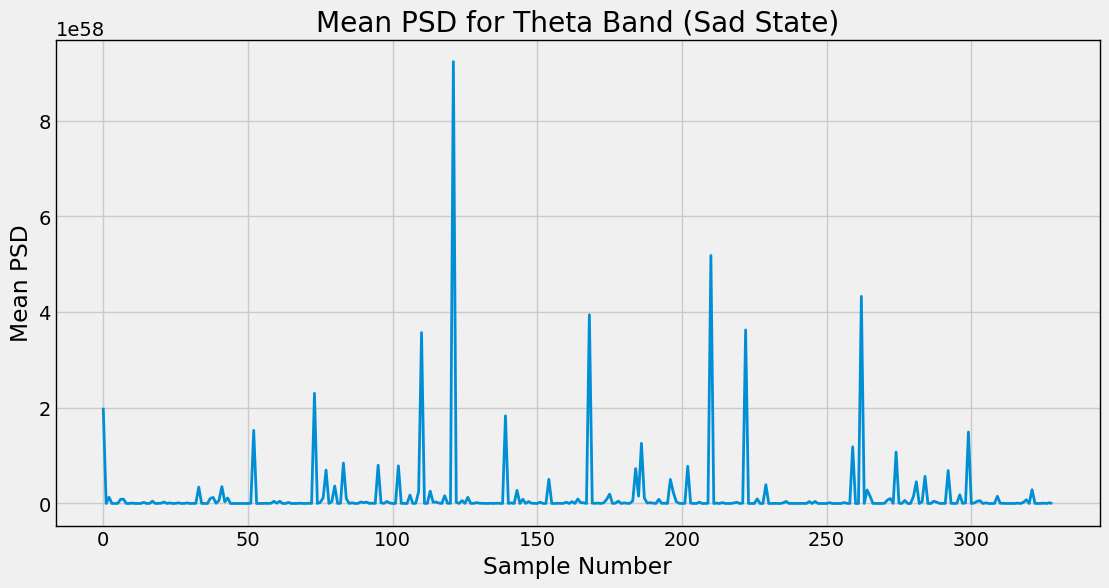

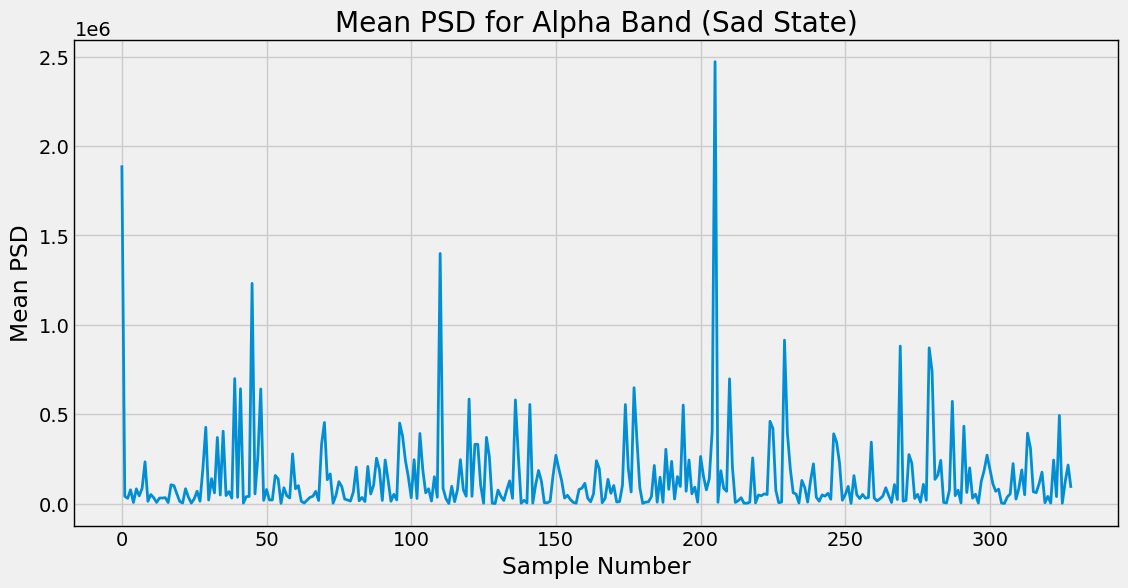

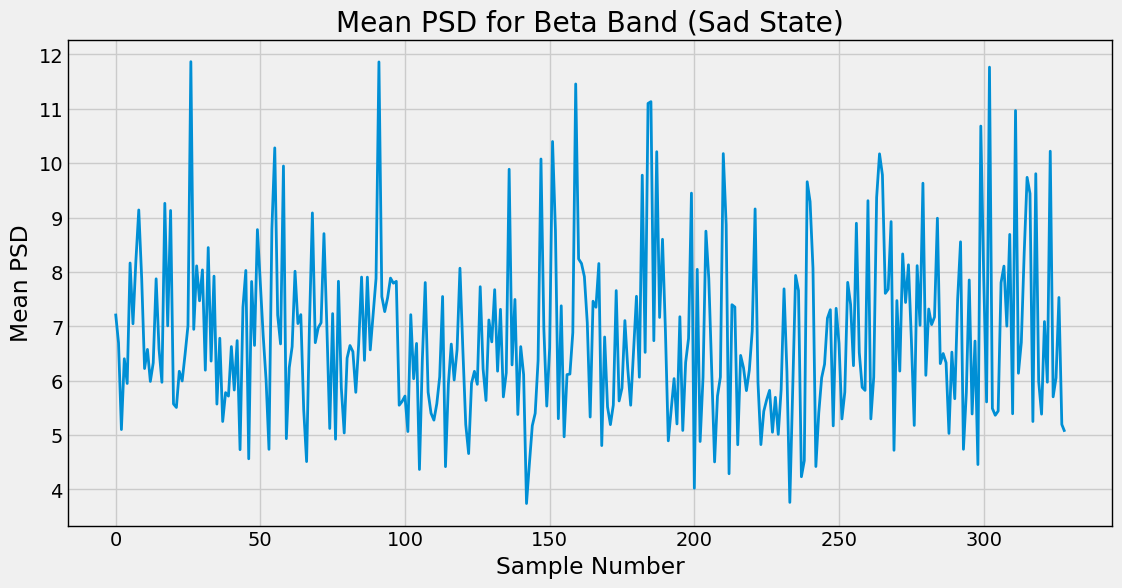

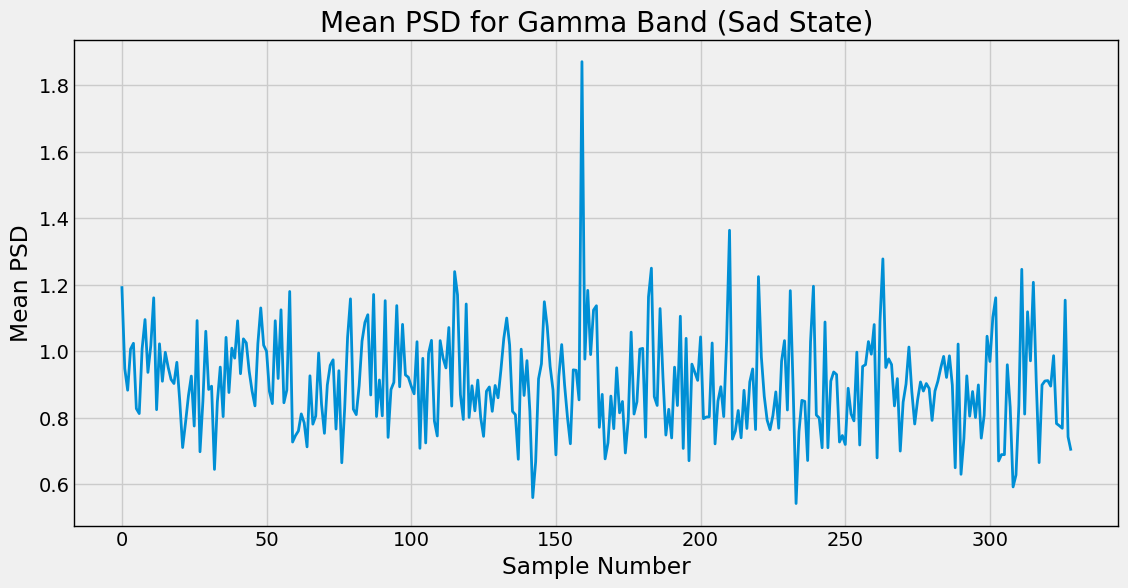

In [239]:
# 7. Plot Mean PSD for each band against the number of samples
plt.figure(figsize=(12, 6))
# Theta Band
plt.plot(sad_data['theta_meanpsd'], label='Theta Band',linewidth=2)
plt.title('Mean PSD for Theta Band (Sad State)')
plt.xlabel('Sample Number')
plt.ylabel('Mean PSD')
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1) 
plt.show()

plt.figure(figsize=(12, 6))
# Alpha Band
plt.plot(sad_data['alpha_meanpsd'], label='Alpha Band',linewidth=2)
plt.title('Mean PSD for Alpha Band (Sad State)')
plt.xlabel('Sample Number')
plt.ylabel('Mean PSD')
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1) 
plt.show()


plt.figure(figsize=(12, 6))
# Beta Band
plt.plot(sad_data['beta_meanpsd'], label='Beta Band',linewidth=2)
plt.title('Mean PSD for Beta Band (Sad State)')
plt.xlabel('Sample Number')
plt.ylabel('Mean PSD')
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1) 
plt.show()


plt.figure(figsize=(12, 6))
# Gamma Band
plt.plot(sad_data['gamma_meanpsd'], label='Gamma Band',linewidth=2)
plt.title('Mean PSD for Gamma Band (Sad State)')
plt.xlabel('Sample Number')
plt.ylabel('Mean PSD')
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1) 
plt.show()

In [240]:
# Convert the string representation of lists into actual lists
sad_data['theta_psd'] = sad_data['theta_psd'].apply(eval)
sad_data['theta_freqs'] = sad_data['theta_freqs'].apply(eval)
sad_data['alpha_psd'] = sad_data['alpha_psd'].apply(eval)
sad_data['alpha_freqs'] = sad_data['alpha_freqs'].apply(eval)
sad_data['beta_psd'] = sad_data['beta_psd'].apply(eval)
sad_data['beta_freqs'] = sad_data['beta_freqs'].apply(eval)
sad_data['gamma_psd'] = sad_data['gamma_psd'].apply(eval)
sad_data['gamma_freqs'] = sad_data['gamma_freqs'].apply(eval)

In [242]:
# Extract PSD values and frequencies for each band
theta_psd = sad_data['theta_psd'].iloc[40]
theta_freqs = sad_data['theta_freqs'].iloc[40]

alpha_psd = sad_data['alpha_psd'].iloc[40]
alpha_freqs = sad_data['alpha_freqs'].iloc[40]

beta_psd = sad_data['beta_psd'].iloc[40]
beta_freqs = sad_data['beta_freqs'].iloc[40]

gamma_psd = sad_data['gamma_psd'].iloc[40]
gamma_freqs = sad_data['gamma_freqs'].iloc[40]

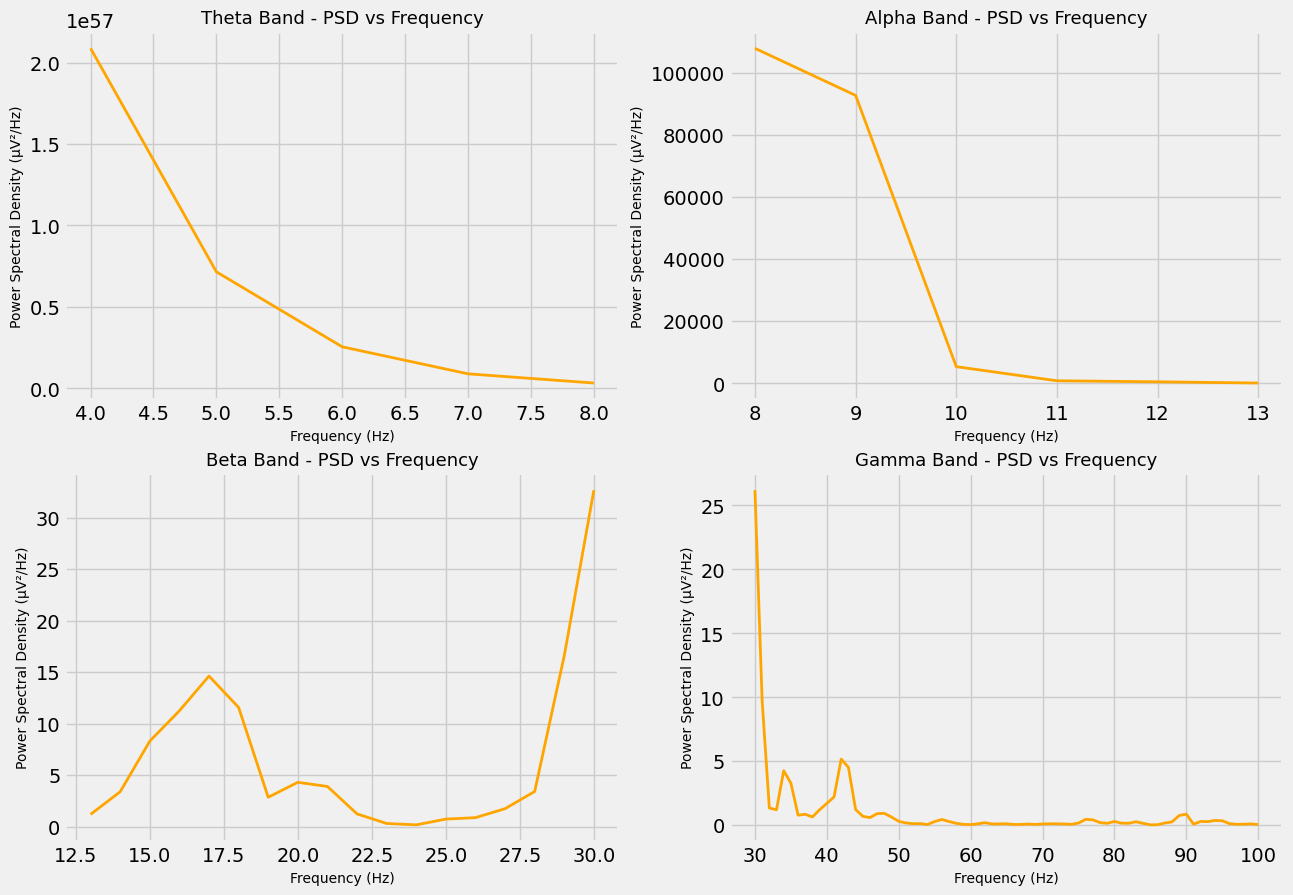

In [ ]:
# Plotting PSD for each frequency band separately
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plotting Theta Band PSD
axs[0, 0].plot(theta_freqs, theta_psd, color='orange',linewidth=2)
axs[0, 0].set_title('Theta Band - PSD vs Frequency',fontsize=13)
axs[0, 0].set_xlabel('Frequency (Hz)',fontsize=10)
axs[0, 0].set_ylabel('Power Spectral Density (μV²/Hz)',fontsize=10)
axs[0, 0].grid(True)



# Plotting Alpha Band PSD
axs[0, 1].plot(alpha_freqs, alpha_psd, color='orange',linewidth=2)
axs[0, 1].set_title('Alpha Band - PSD vs Frequency',fontsize=13)
axs[0, 1].set_xlabel('Frequency (Hz)',fontsize=10)
axs[0, 1].set_ylabel('Power Spectral Density (μV²/Hz)',fontsize=10)
axs[0, 1].grid(True)

# Plotting Beta Band PSD
axs[1, 0].plot(beta_freqs, beta_psd, color='orange',linewidth=2)
axs[1, 0].set_title('Beta Band - PSD vs Frequency',fontsize=13)
axs[1, 0].set_xlabel('Frequency (Hz)',fontsize=10)
axs[1, 0].set_ylabel('Power Spectral Density (μV²/Hz)',fontsize=10)
axs[1, 0].grid(True)

# Plotting Gamma Band PSD
axs[1, 1].plot(gamma_freqs, gamma_psd, color='orange',linewidth=2)
axs[1, 1].set_title('Gamma Band - PSD vs Frequency',fontsize=13)
axs[1, 1].set_xlabel('Frequency (Hz)',fontsize=10)
axs[1, 1].set_ylabel('Power Spectral Density (μV²/Hz)',fontsize=10)
axs[1, 1].grid(True)



plt.show()

In [247]:
# Convert the string representation of lists into actual lists
happy_data['theta_psd'] = happy_data['theta_psd'].apply(eval)
happy_data['theta_freqs'] = happy_data['theta_freqs'].apply(eval)
happy_data['alpha_psd'] = happy_data['alpha_psd'].apply(eval)
happy_data['alpha_freqs'] = happy_data['alpha_freqs'].apply(eval)
happy_data['beta_psd'] = happy_data['beta_psd'].apply(eval)
happy_data['beta_freqs'] = happy_data['beta_freqs'].apply(eval)
happy_data['gamma_psd'] = happy_data['gamma_psd'].apply(eval)
happy_data['gamma_freqs'] = happy_data['gamma_freqs'].apply(eval)

In [250]:
# Extract PSD values and frequencies for each band
theta_psd = happy_data['theta_psd'].iloc[40]
theta_freqs = happy_data['theta_freqs'].iloc[40]

alpha_psd = happy_data['alpha_psd'].iloc[40]
alpha_freqs = happy_data['alpha_freqs'].iloc[40]

beta_psd = happy_data['beta_psd'].iloc[40]
beta_freqs = happy_data['beta_freqs'].iloc[40]

gamma_psd = happy_data['gamma_psd'].iloc[40]
gamma_freqs = happy_data['gamma_freqs'].iloc[40]

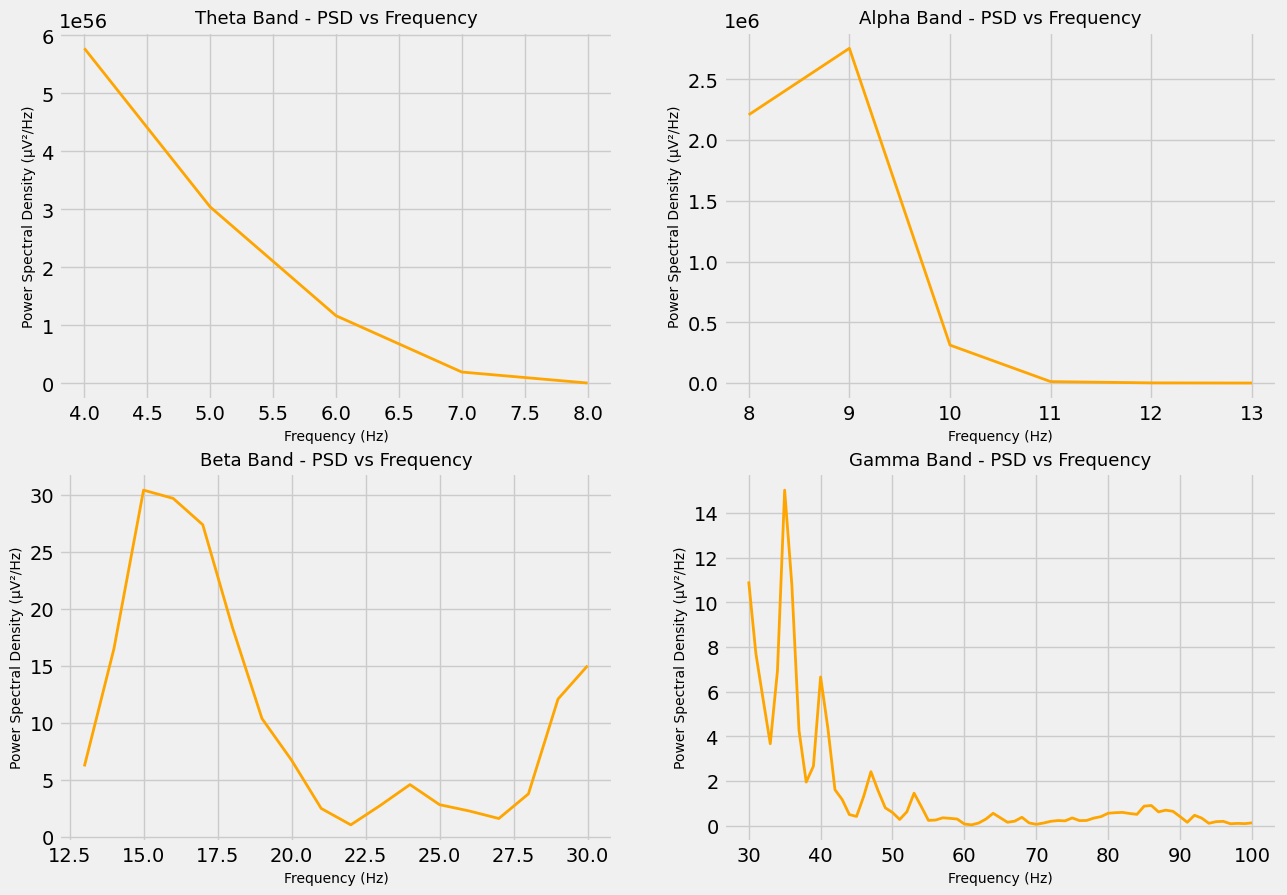

In [ ]:
# Plotting PSD for each frequency band separately
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plotting Theta Band PSD
axs[0, 0].plot(theta_freqs, theta_psd, color='orange',linewidth=2)
axs[0, 0].set_title('Theta Band - PSD vs Frequency',fontsize=13)
axs[0, 0].set_xlabel('Frequency (Hz)',fontsize=10)
axs[0, 0].set_ylabel('Power Spectral Density (μV²/Hz)',fontsize=10)
axs[0, 0].grid(True)



# Plotting Alpha Band PSD
axs[0, 1].plot(alpha_freqs, alpha_psd, color='orange',linewidth=2)
axs[0, 1].set_title('Alpha Band - PSD vs Frequency',fontsize=13)
axs[0, 1].set_xlabel('Frequency (Hz)',fontsize=10)
axs[0, 1].set_ylabel('Power Spectral Density (μV²/Hz)',fontsize=10)
axs[0, 1].grid(True)

# Plotting Beta Band PSD
axs[1, 0].plot(beta_freqs, beta_psd, color='orange',linewidth=2)
axs[1, 0].set_title('Beta Band - PSD vs Frequency',fontsize=13)
axs[1, 0].set_xlabel('Frequency (Hz)',fontsize=10)
axs[1, 0].set_ylabel('Power Spectral Density (μV²/Hz)',fontsize=10)
axs[1, 0].grid(True)

# Plotting Gamma Band PSD
axs[1, 1].plot(gamma_freqs, gamma_psd, color='orange',linewidth=2)
axs[1, 1].set_title('Gamma Band - PSD vs Frequency',fontsize=13)
axs[1, 1].set_xlabel('Frequency (Hz)',fontsize=10)
axs[1, 1].set_ylabel('Power Spectral Density (μV²/Hz)',fontsize=10)
axs[1, 1].grid(True)



plt.show()

In [143]:
# The TGAM device uses only a single EEG electrode, which reduces the amount of captured data compared to multi-electrode setups. 
# While this makes the device cheaper and more convenient, it may lead to reduced accuracy in detecting subtle emotional states. 
# The trade-off between cost and accuracy should be considered based on the application's requirements (e.g., real-time emotion detection vs. clinical diagnosis).

In [ ]:
happy_data['label'] = 1  # Label 'happy' as 1
sad_data['label'] = 0    # Label 'sad' as 0

In [ ]:
#Merge both datasets as one set named data
data = pd.concat([happy_data, sad_data], axis=0).reset_index(drop=True)
data.shape

(658, 29)

In [ ]:
#Exclude the Label, and lists Column during Training
X = data.drop(columns=['label','timestamp','theta_psd','theta_freqs','alpha_psd','alpha_freqs','beta_psd','beta_freqs','gamma_psd','gamma_freqs'])
y = data['label']
X.columns

Index(['spectral_entropy', 'permutation_entropy', 'theta_meanpsd',
       'theta_mean', 'theta_std', 'theta_power', 'alpha_meanpsd', 'alpha_mean',
       'alpha_std', 'alpha_power', 'beta_meanpsd', 'beta_mean', 'beta_std',
       'beta_power', 'gamma_meanpsd', 'gamma_mean', 'gamma_std', 'gamma_power',
       'power_ratio'],
      dtype='object')

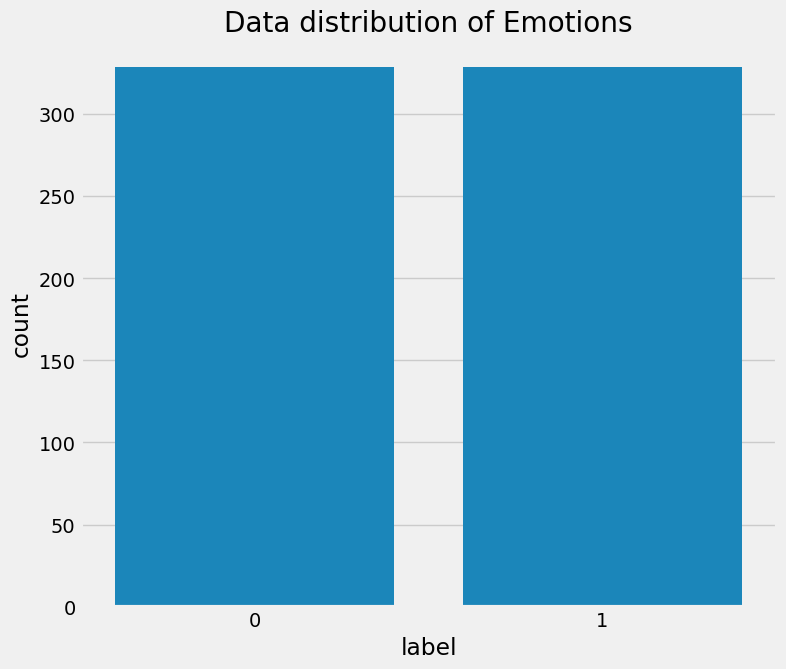

In [ ]:
#plottintg Dataframe distribution to ensure balanced
plt.figure(figsize=(8,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

In [ ]:
#split data into training and testing for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X.columns)  # Print all columns used for training
print(f"Number of features for training: {X.shape[1]}")

Index(['spectral_entropy', 'permutation_entropy', 'theta_meanpsd',
       'theta_mean', 'theta_std', 'theta_power', 'alpha_meanpsd', 'alpha_mean',
       'alpha_std', 'alpha_power', 'beta_meanpsd', 'beta_mean', 'beta_std',
       'beta_power', 'gamma_meanpsd', 'gamma_mean', 'gamma_std', 'gamma_power',
       'power_ratio'],
      dtype='object')
Number of features for training: 19


In [ ]:
#scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#use GridSearch to find the best hyperparameters
param_grid = {
    'C': [0.1,1,10,100],  # Range of C values to try
   'gamma': [10,1, 0.1, 0.01, 0.001, 0.0001,'scale'],  # Range of gamma values to try
    'kernel': ['rbf']  # Using RBF kernel
}

In [154]:
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, refit=True, cv=5, scoring='accuracy') 
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [164]:
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best Parameters found by GridSearchCV:
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [165]:
best_svm = grid_search.best_estimator_
y_pred = grid_search.predict(X_test_scaled)

In [ ]:
# The TGAM device uses only a single EEG electrode, which reduces the amount of captured data compared to multi-electrode setups. 
# While this makes the device cheaper and more convenient, it may lead to reduced accuracy in detecting subtle emotional states. 
# The trade-off between cost and accuracy should be considered based on the application's requirements .

In [166]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8863636363636364
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        68
           1       0.96      0.80      0.87        64

    accuracy                           0.89       132
   macro avg       0.90      0.88      0.88       132
weighted avg       0.90      0.89      0.89       132



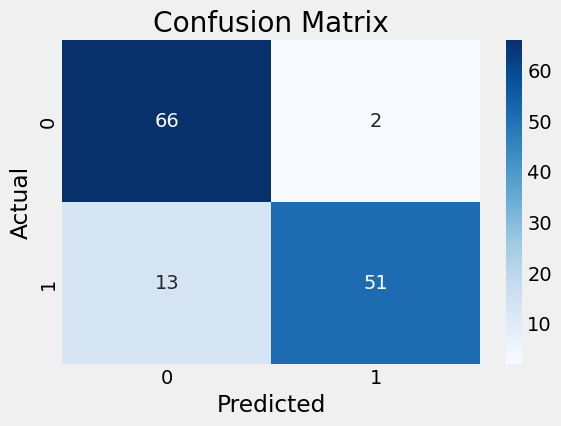

In [175]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

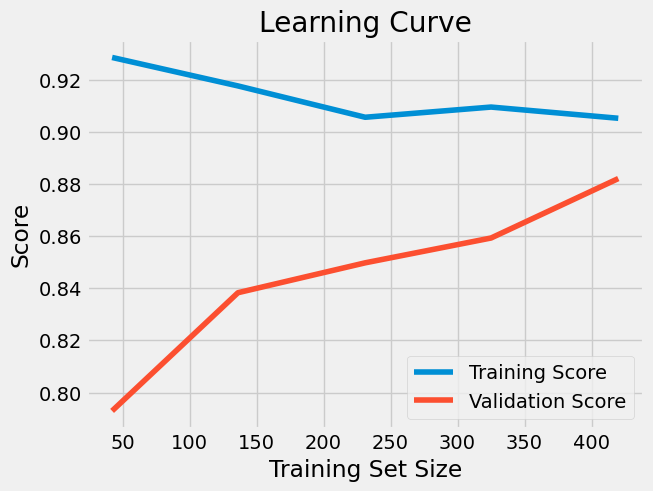

In [167]:
train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train_scaled, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curve')
plt.show()